#                                Project: Titanic Survival Exploration 2 

---

## Limpando os dados e construindo uma Árvore de Decisão.

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Carregando os dados e verificando o conteúdo.

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
# Verificando as dimensões dos data frames
print("Dimensoes da matriz de treino: ",df_train.shape)
print("Dimensoes da matriz de teste: ",df_test.shape)

Dimensoes da matriz de treino:  (891, 12)
Dimensoes da matriz de teste:  (418, 11)


In [4]:
# Aspecto da tabela de dados para treino
df_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
245,246,0,1,"Minahan, Dr. William Edward",male,44.00,2,0,19928,90.00,C78,Q
744,745,1,3,"Stranden, Mr. Juho",male,31.00,0,0,STON/O 2. 3101288,7.92,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.00,C23 C25 C27,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.00,2,0,345764,18.00,NaN,S
497,498,0,3,"Shellard, Mr. Frederick William",male,nan,0,0,C.A. 6212,15.10,NaN,S
622,623,1,3,"Nakid, Mr. Sahid",male,20.00,1,1,2653,15.74,NaN,C
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.00,1,1,248738,29.00,NaN,S
545,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.00,0,0,693,26.00,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.25,NaN,C
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.00,0,0,330958,7.88,NaN,Q


#### Identificando as colunas

* PassengerId: Número de identificação do passageiro;

* Survived: Indica se o passageiro sobreviveu ao desastre. É atribuído o valor de 0 para aqueles que não sobreviveram, e 1 para quem sobreviveu;

* Pclass: Classe na qual o passageiro viajou. É informado 1 para primeira classe; 2 para segunda; e 3 para terceira;

* Name: Nome do passageiro;

* Sex: Sexo do passageiro;

* Age: Idade do passageiro em anos;

* SibSp: Quantidade de irmãos e cônjuges a bordo ;

* Parch: Quantidade de pais e filhos a bordo;

* Ticket: Número da passagem;

* Fare: Preço da passagem;

* Cabin: Número da cabine do passageiro;

* Embarked: Porto no qual o passageiro embarcou. Há apenas três valores possíveis: Cherbourg, Queenstown e Southampton, indicados pelas letras “C”, “Q” e “S”, respectivamente.

In [5]:
# Aspecto dos dados da tabela para testes
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


### Verificando a relação entre o gênero e o número de sobreviventes.

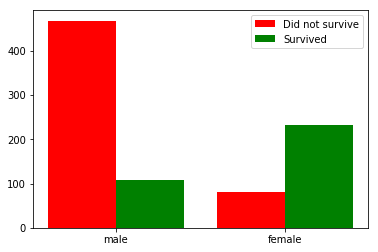

In [6]:
male = [0,0]; female = [0,0]; surv_bar = [0,0]
color_bar = ['r', 'g']; bar_pos = [-0.4,0.0,0.6,1.0]
bar_width = 0.4
for i in [0,1]:
    male[i] = (df_train[df_train['Survived'] == i]['Sex'] == 'male').sum()
    female[i] = (df_train[df_train['Survived'] == i]['Sex'] == 'female').sum()
    surv_bar[i] = plt.bar(bar_pos[i], male[i], width = bar_width, color = color_bar[i])
    plt.bar(bar_pos[i+2], female[i], width = bar_width, color = color_bar[i])
plt.xticks([-0.2,0.8], ['male', 'female'])  
plt.legend((surv_bar[0],surv_bar[1]),('Did not survive', 'Survived'), framealpha = 0.8);

Verificamos que a maioria dos sobreviventes foram mulheres. 

### Verificando a idade dos sobreviventes 

In [7]:
import matplotlib.style
import matplotlib as mpl

In [8]:
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='rbgcmyk')

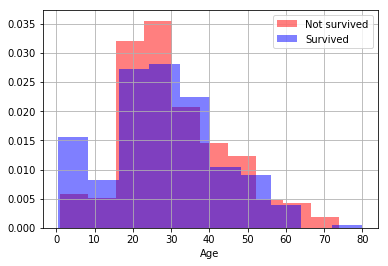

In [9]:
df_train.groupby('Survived').Age.hist(alpha=0.5, density = True)
plt.xlabel("Age")
plt.legend(["Not survived", "Survived"]);

### Verificando a correlação entre as propriedades

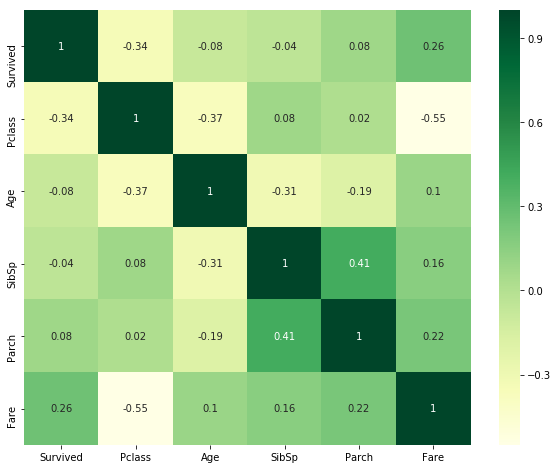

In [10]:
cor_matrix = df_train.drop(columns=['PassengerId']).corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(10,8));
sns.heatmap(cor_matrix, annot=True, cmap="YlGn");

## Removendo dados irrelevantes

Observa-se que nos dados de teste, apareceu valores NaN para 'Cabin'. Além de conter NaN nos testes, esta informação poderia sugerir que, conforme o número da cabine, o passageiro pode ser de primeira, segunda, ou terceira classe, o que permite especular que a primeira classe teria acesso fácil para sair do navio. No entanto, já existe uma coluna classificando o passageiro pela classe, tornado o número da cabine uma informação redundante.

Também é claro que o 'Name' e o número do 'Ticket' não exerceriam qualquer influência na pessoa se salvar do naufrágio.

Removemos estas três.

In [11]:
df_train.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
df_test.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

## One-hot encoding

Na análise acima, observamos que o gênero foi importante para definir quem iria se salvar. Como esta variável é categórica, male e female, precisamos construir uma tabela binária para classificar cada um dos gêneros. A construção desta tabela binária chama-se *One-hot enconding*. 

In [12]:
train = pd.get_dummies(df_train)
test = pd.get_dummies(df_test)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.00,1,0,7.25,0,1,0,0,1
1,2,1,1,38.00,1,0,71.28,1,0,1,0,0
2,3,1,3,26.00,0,0,7.92,1,0,0,0,1
3,4,1,1,35.00,1,0,53.10,1,0,0,0,1
4,5,0,3,35.00,0,0,8.05,0,1,0,0,1


In [14]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.50,0,0,7.83,0,1,0,1,0
1,893,3,47.00,1,0,7.00,1,0,0,0,1
2,894,2,62.00,0,0,9.69,0,1,0,1,0
3,895,3,27.00,0,0,8.66,0,1,0,0,1
4,896,3,22.00,1,1,12.29,1,0,0,0,1


## Tratando os missing numbers (NaN)

In [15]:
# Verificando o numero de missing numbers com .isnull()
train.isnull().sum().sort_values(ascending = False)

Age            177
Embarked_S       0
Embarked_Q       0
Embarked_C       0
Sex_male         0
Sex_female       0
Fare             0
Parch            0
SibSp            0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [16]:
test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
Embarked_S      0
Embarked_Q      0
Embarked_C      0
Sex_male        0
Sex_female      0
Parch           0
SibSp           0
Pclass          0
PassengerId     0
dtype: int64

In [17]:
# Preenchendo os valores nulos das idades com a media
train['Age'].fillna(train['Age'].mean(), inplace = True)
test['Age'].fillna(test['Age'].mean(), inplace = True)

In [18]:
test['Fare'].fillna(test['Fare'].mean(), inplace= True)

In [19]:
# Verificando a substituição
train.isnull().sum().sort_values(ascending = False)

Embarked_S     0
Embarked_Q     0
Embarked_C     0
Sex_male       0
Sex_female     0
Fare           0
Parch          0
SibSp          0
Age            0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [20]:
test.isnull().sum().sort_values(ascending = False)

Embarked_S     0
Embarked_Q     0
Embarked_C     0
Sex_male       0
Sex_female     0
Fare           0
Parch          0
SibSp          0
Age            0
Pclass         0
PassengerId    0
dtype: int64

---
## Classificador:  Machine Learning

### Separando os features e targets:

In [21]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

### Criando o modelo

In [22]:
# Importando o classificador.
from sklearn.tree import DecisionTreeClassifier

# Definindo os parâmetros para o classificador
param = {} # Criando um dictionary para lista de parâmetros
param['max_depth'] = 3
param['random_state'] = 42 

clf = DecisionTreeClassifier(**param)

### Treinando o  modelo.

In [23]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [24]:
# Verificando o score dos dados de treino
print("Precisão do modelo: {:.2f}%".format(clf.score(X,y)*100))

Precisão do modelo: 82.72%


### Visualizando a árvore de decisão

In [25]:
from sklearn.externals.six import StringIO
from sklearn import tree
import pydotplus
dot_data = StringIO()
tree.export_graphviz(clf,
                     out_file=dot_data,
                     feature_names=list(X.columns),
                     class_names = ['Not Survived', 'Survived'],
                     filled=True, rounded=True,
                     impurity=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Decision_tree_Titanic.png")

True

### Inferindo resultado com os dados de teste.


In [26]:
Inference = pd.DataFrame()
Inference['PassengerId'] = test['PassengerId']
Inference['Survived'] = clf.predict(test)

## Salvando os dados para submissão no Kaggle

In [27]:
Inference.to_csv('submission.csv', index=False)

Score de 0.77990 no Kaggle